In [1]:
from torchvision.models import resnet50, ResNet50_Weights, resnet18, ResNet18_Weights, list_models, alexnet, AlexNet_Weights, convnext_base, ConvNeXt_Base_Weights, convnext_tiny, ConvNeXt_Tiny_Weights, mobilenet_v3_small, MobileNet_V3_Small_Weights
from torchinfo import summary
import matplotlib.pyplot as plt
import torch
from activation_visualization import rescaleZeroOne, effective_receptive_field, multiplot

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [3]:
list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

# Resnet

/gpfs01/berens/user/fseel/projects/receptive-fields/src/activation_visualization.py:44: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392026823/work/aten/src/ATen/native/IndexingUtils.h:27.)
  global_max = np.abs(eff_rfs[~np.isnan(eff_rfs)]).numpy().max()


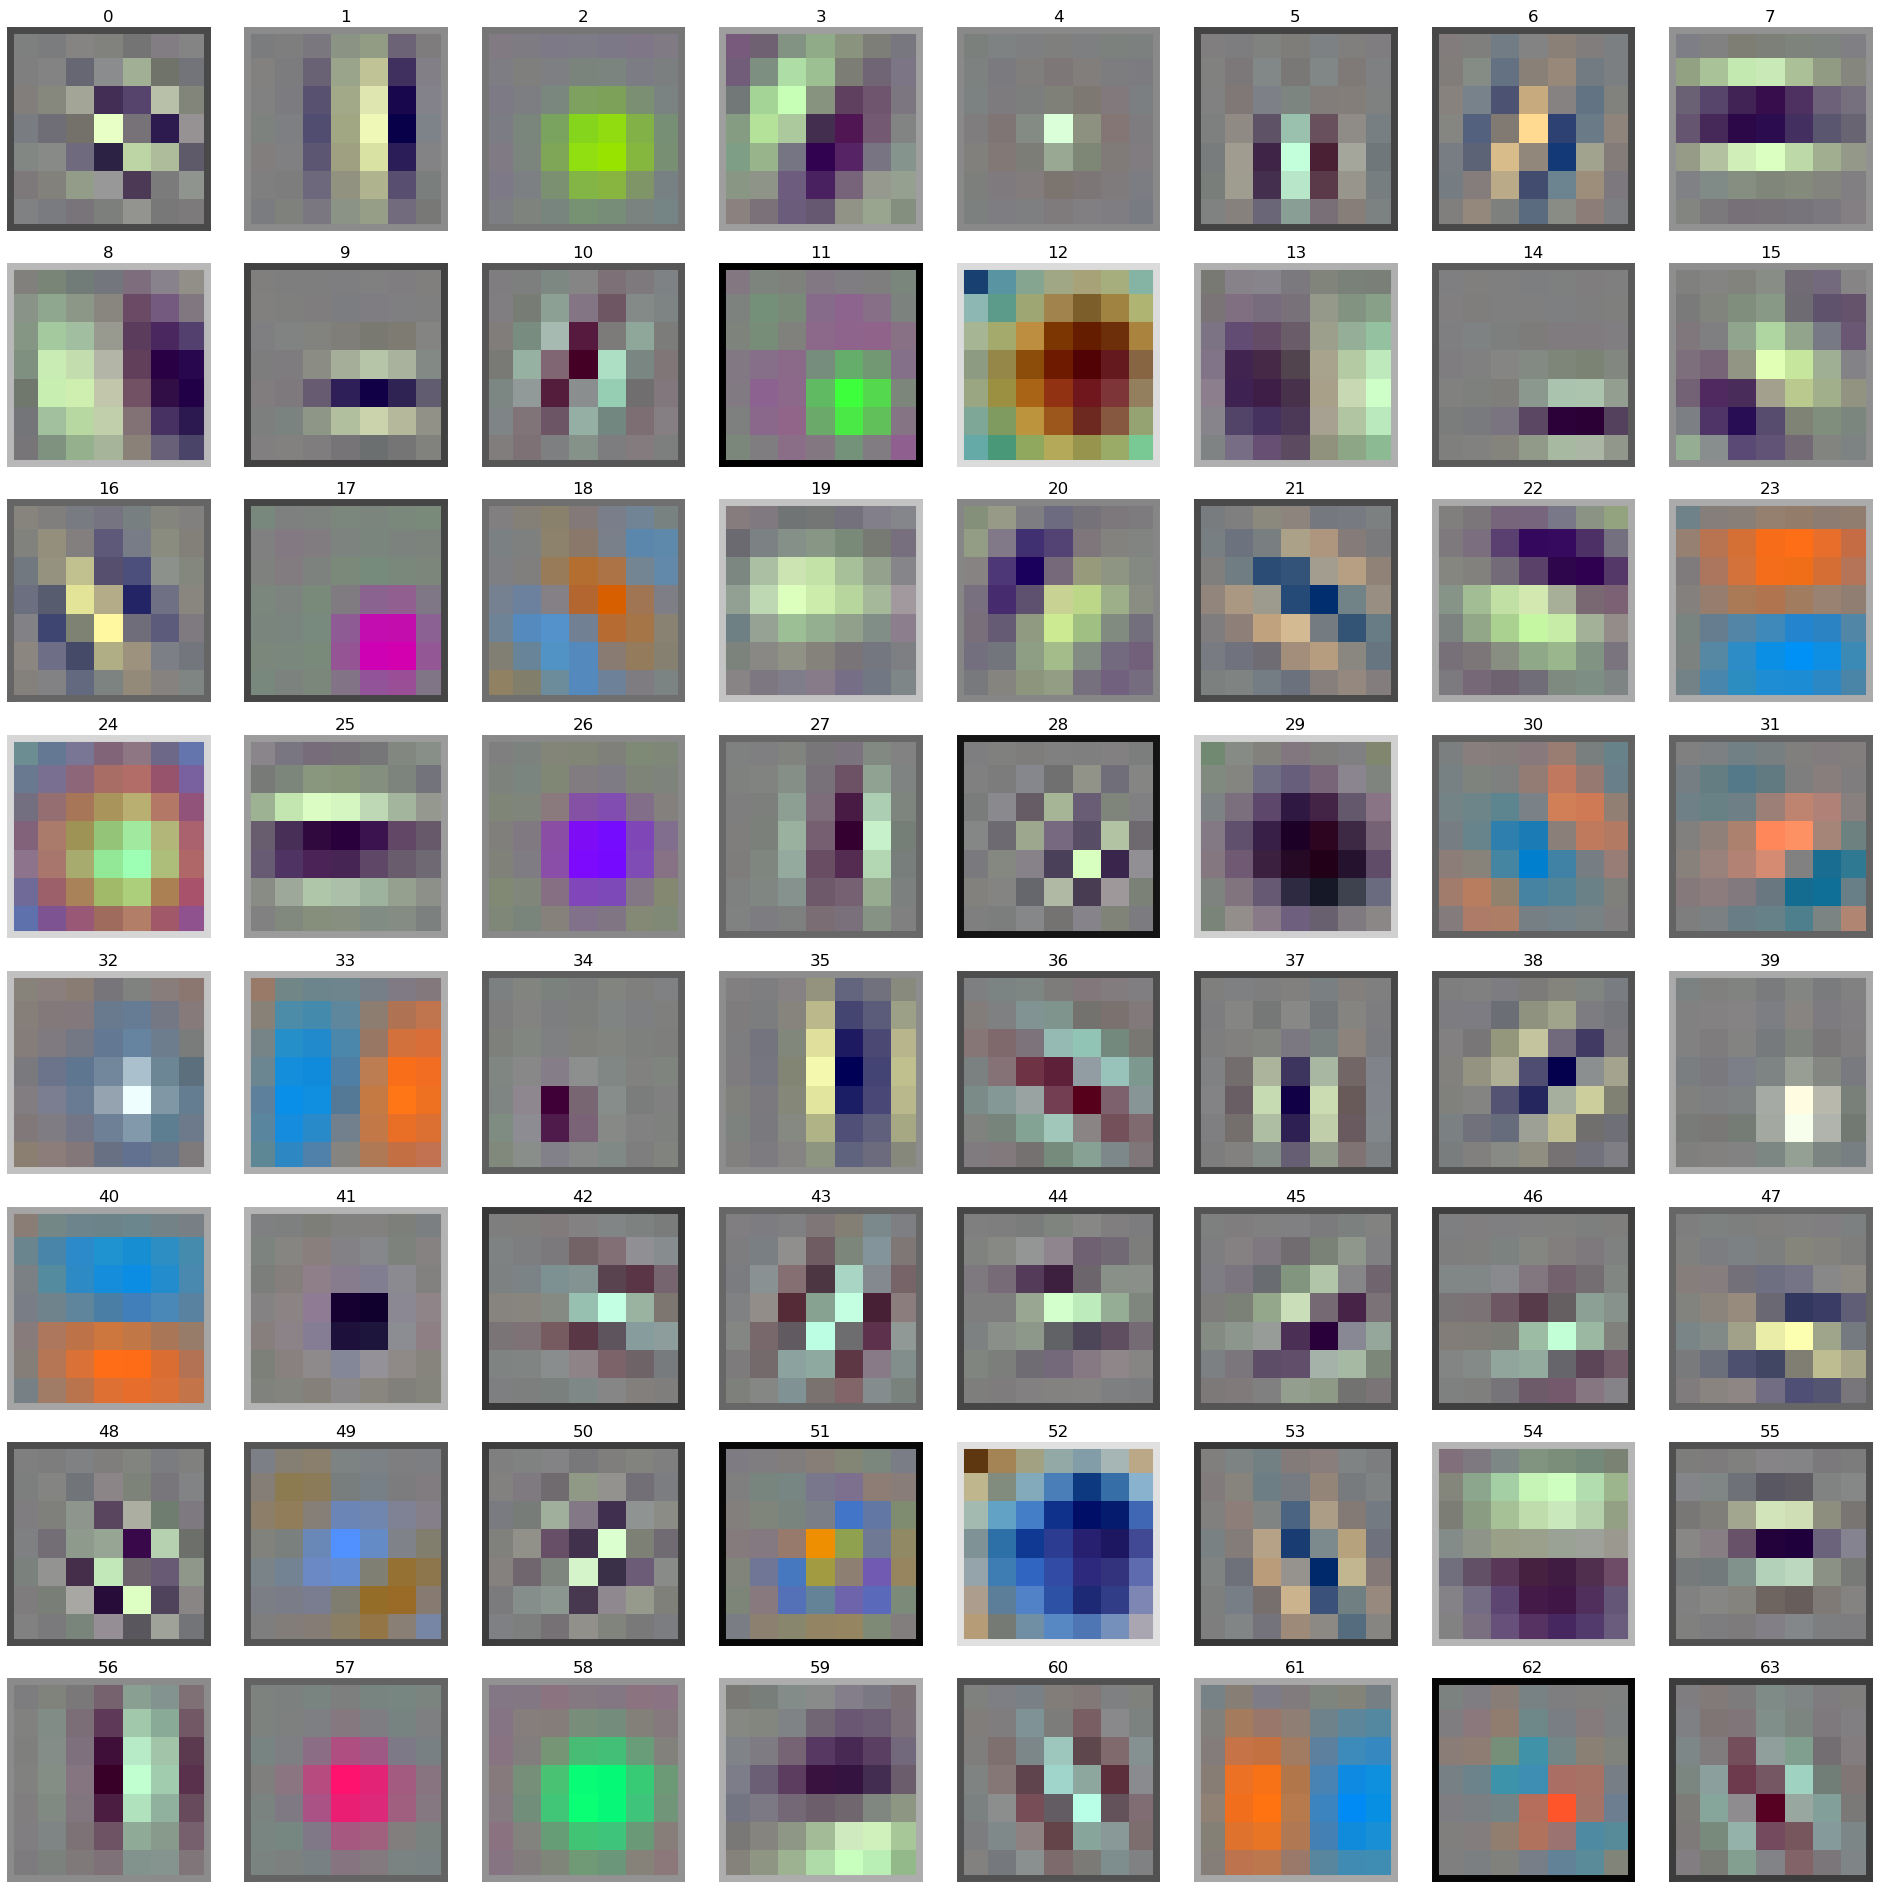

In [4]:
resnet_50 = resnet50(weights=ResNet50_Weights.DEFAULT)
multiplot(resnet_50.conv1.weight.detach())

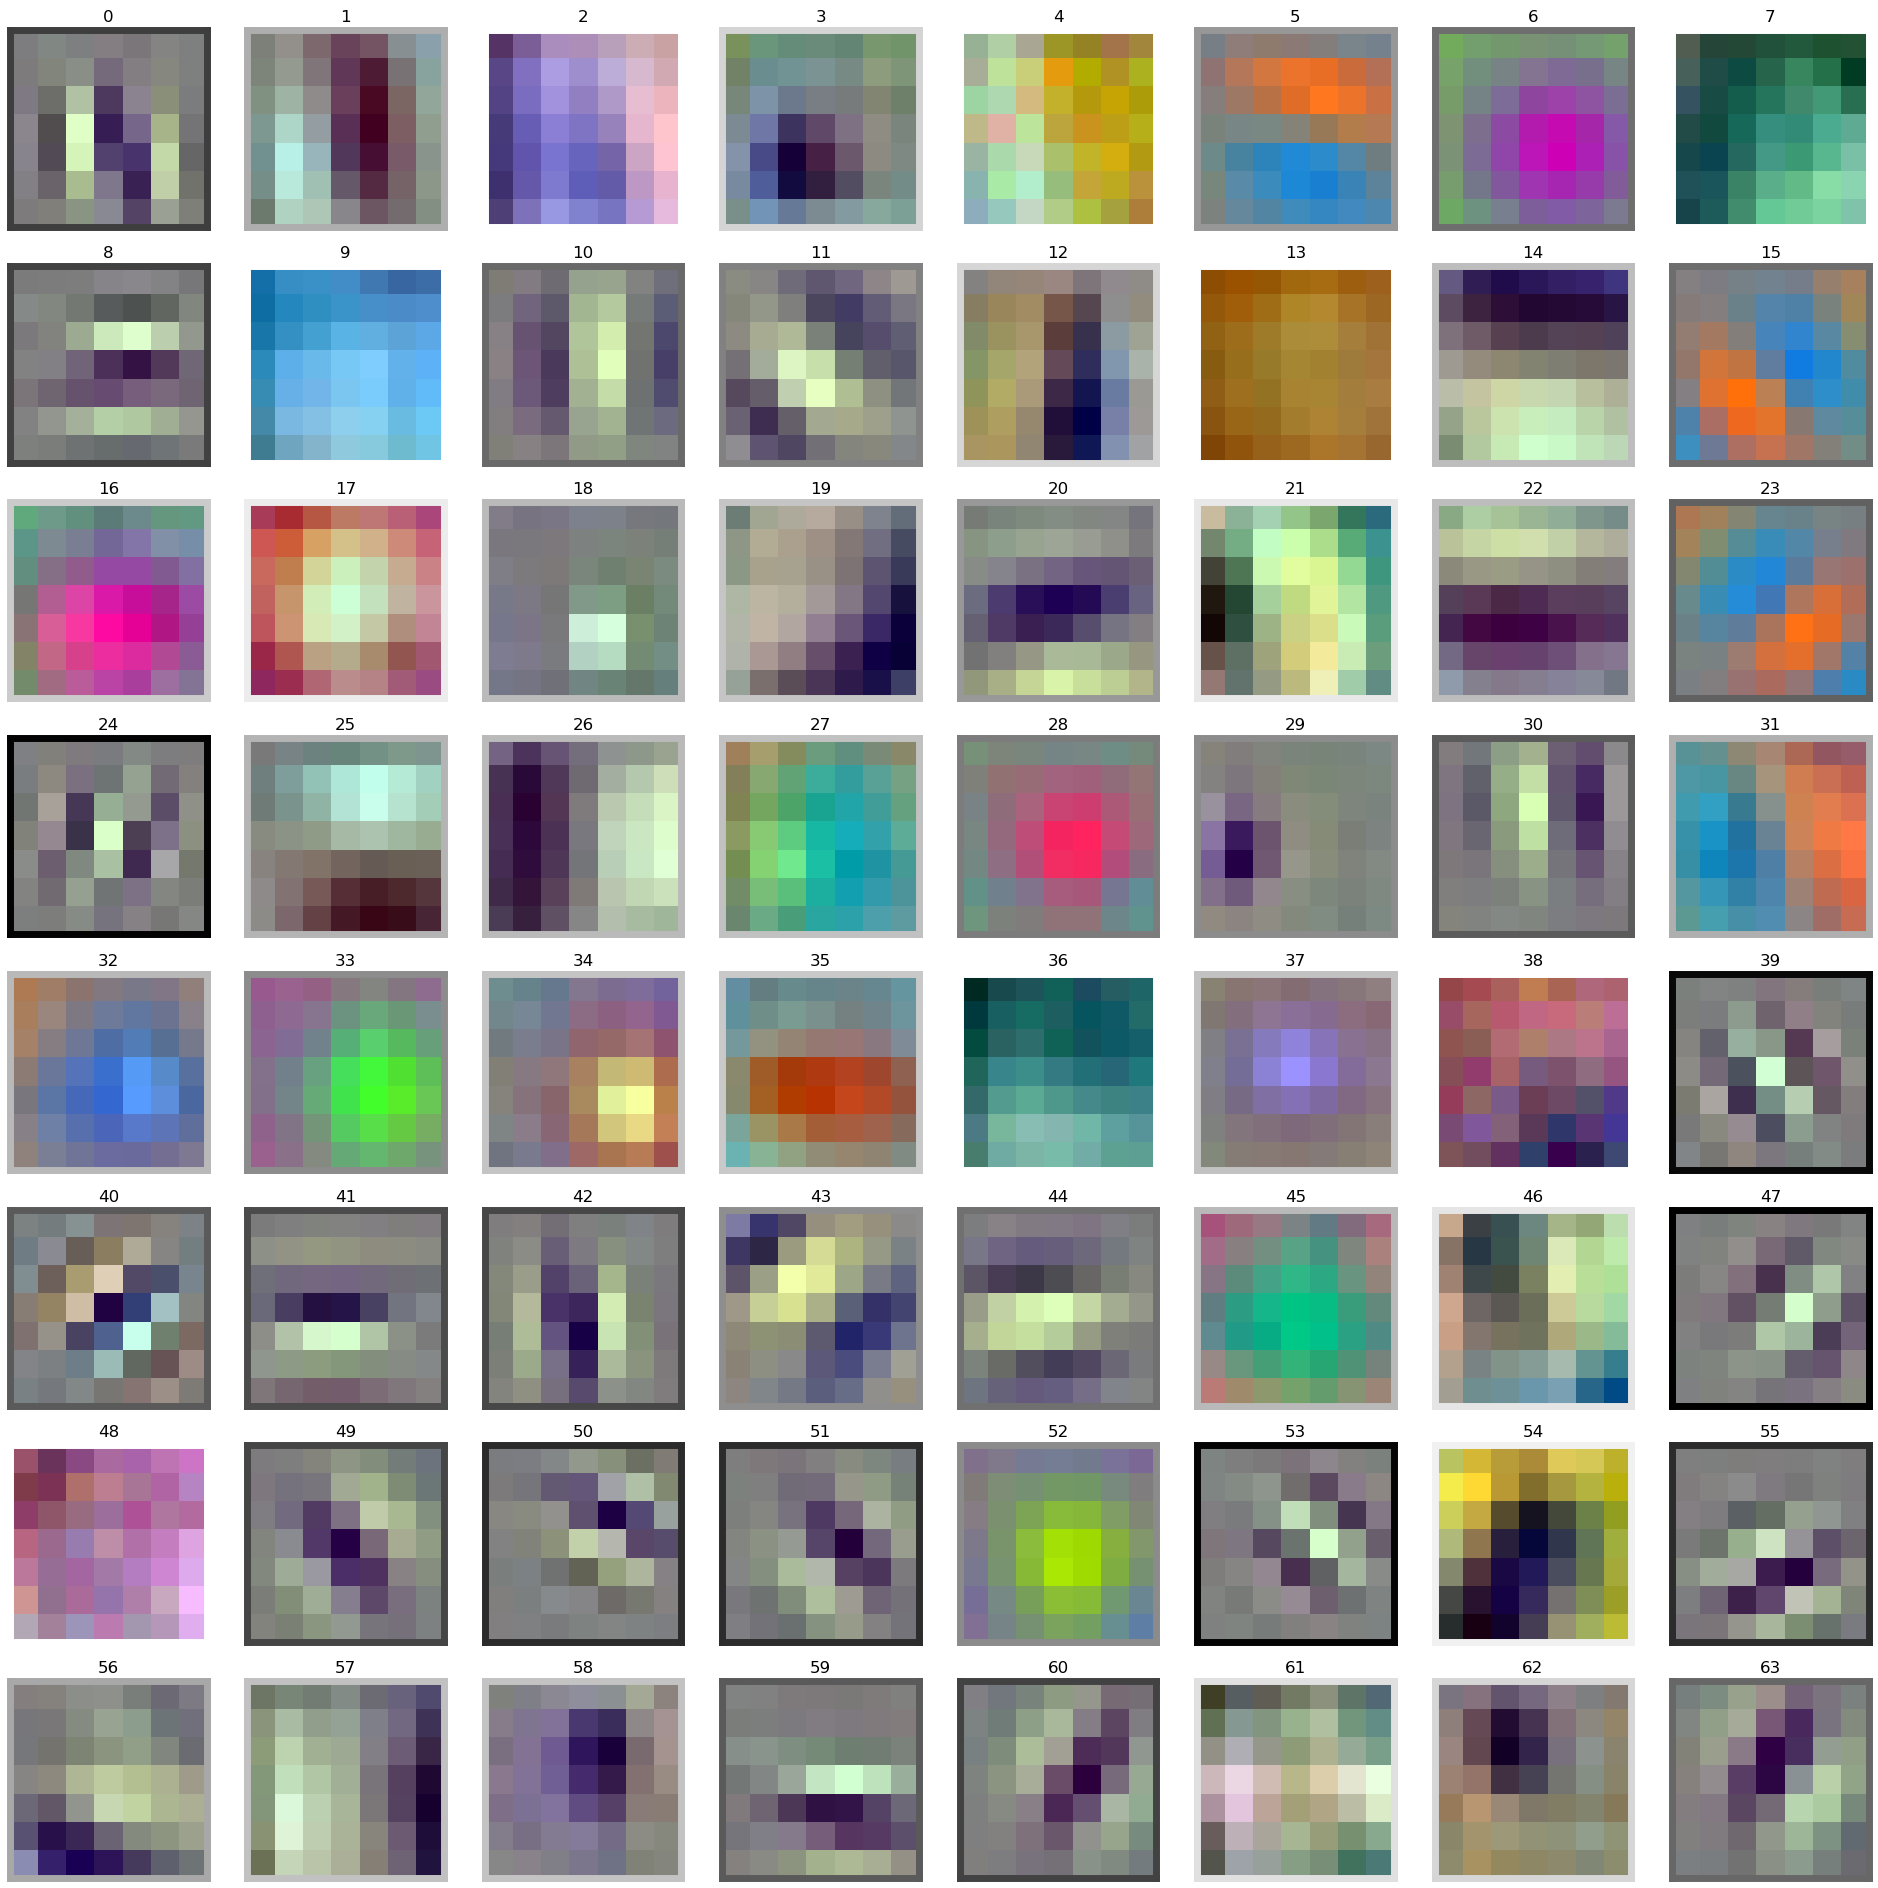

In [5]:
resnet_18 = resnet18(weights=ResNet18_Weights.DEFAULT)
multiplot(resnet_18.conv1.weight.detach())

# AlexNet

/gpfs01/berens/user/fseel/miniconda3/envs/receptive-fields/lib/python3.11/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


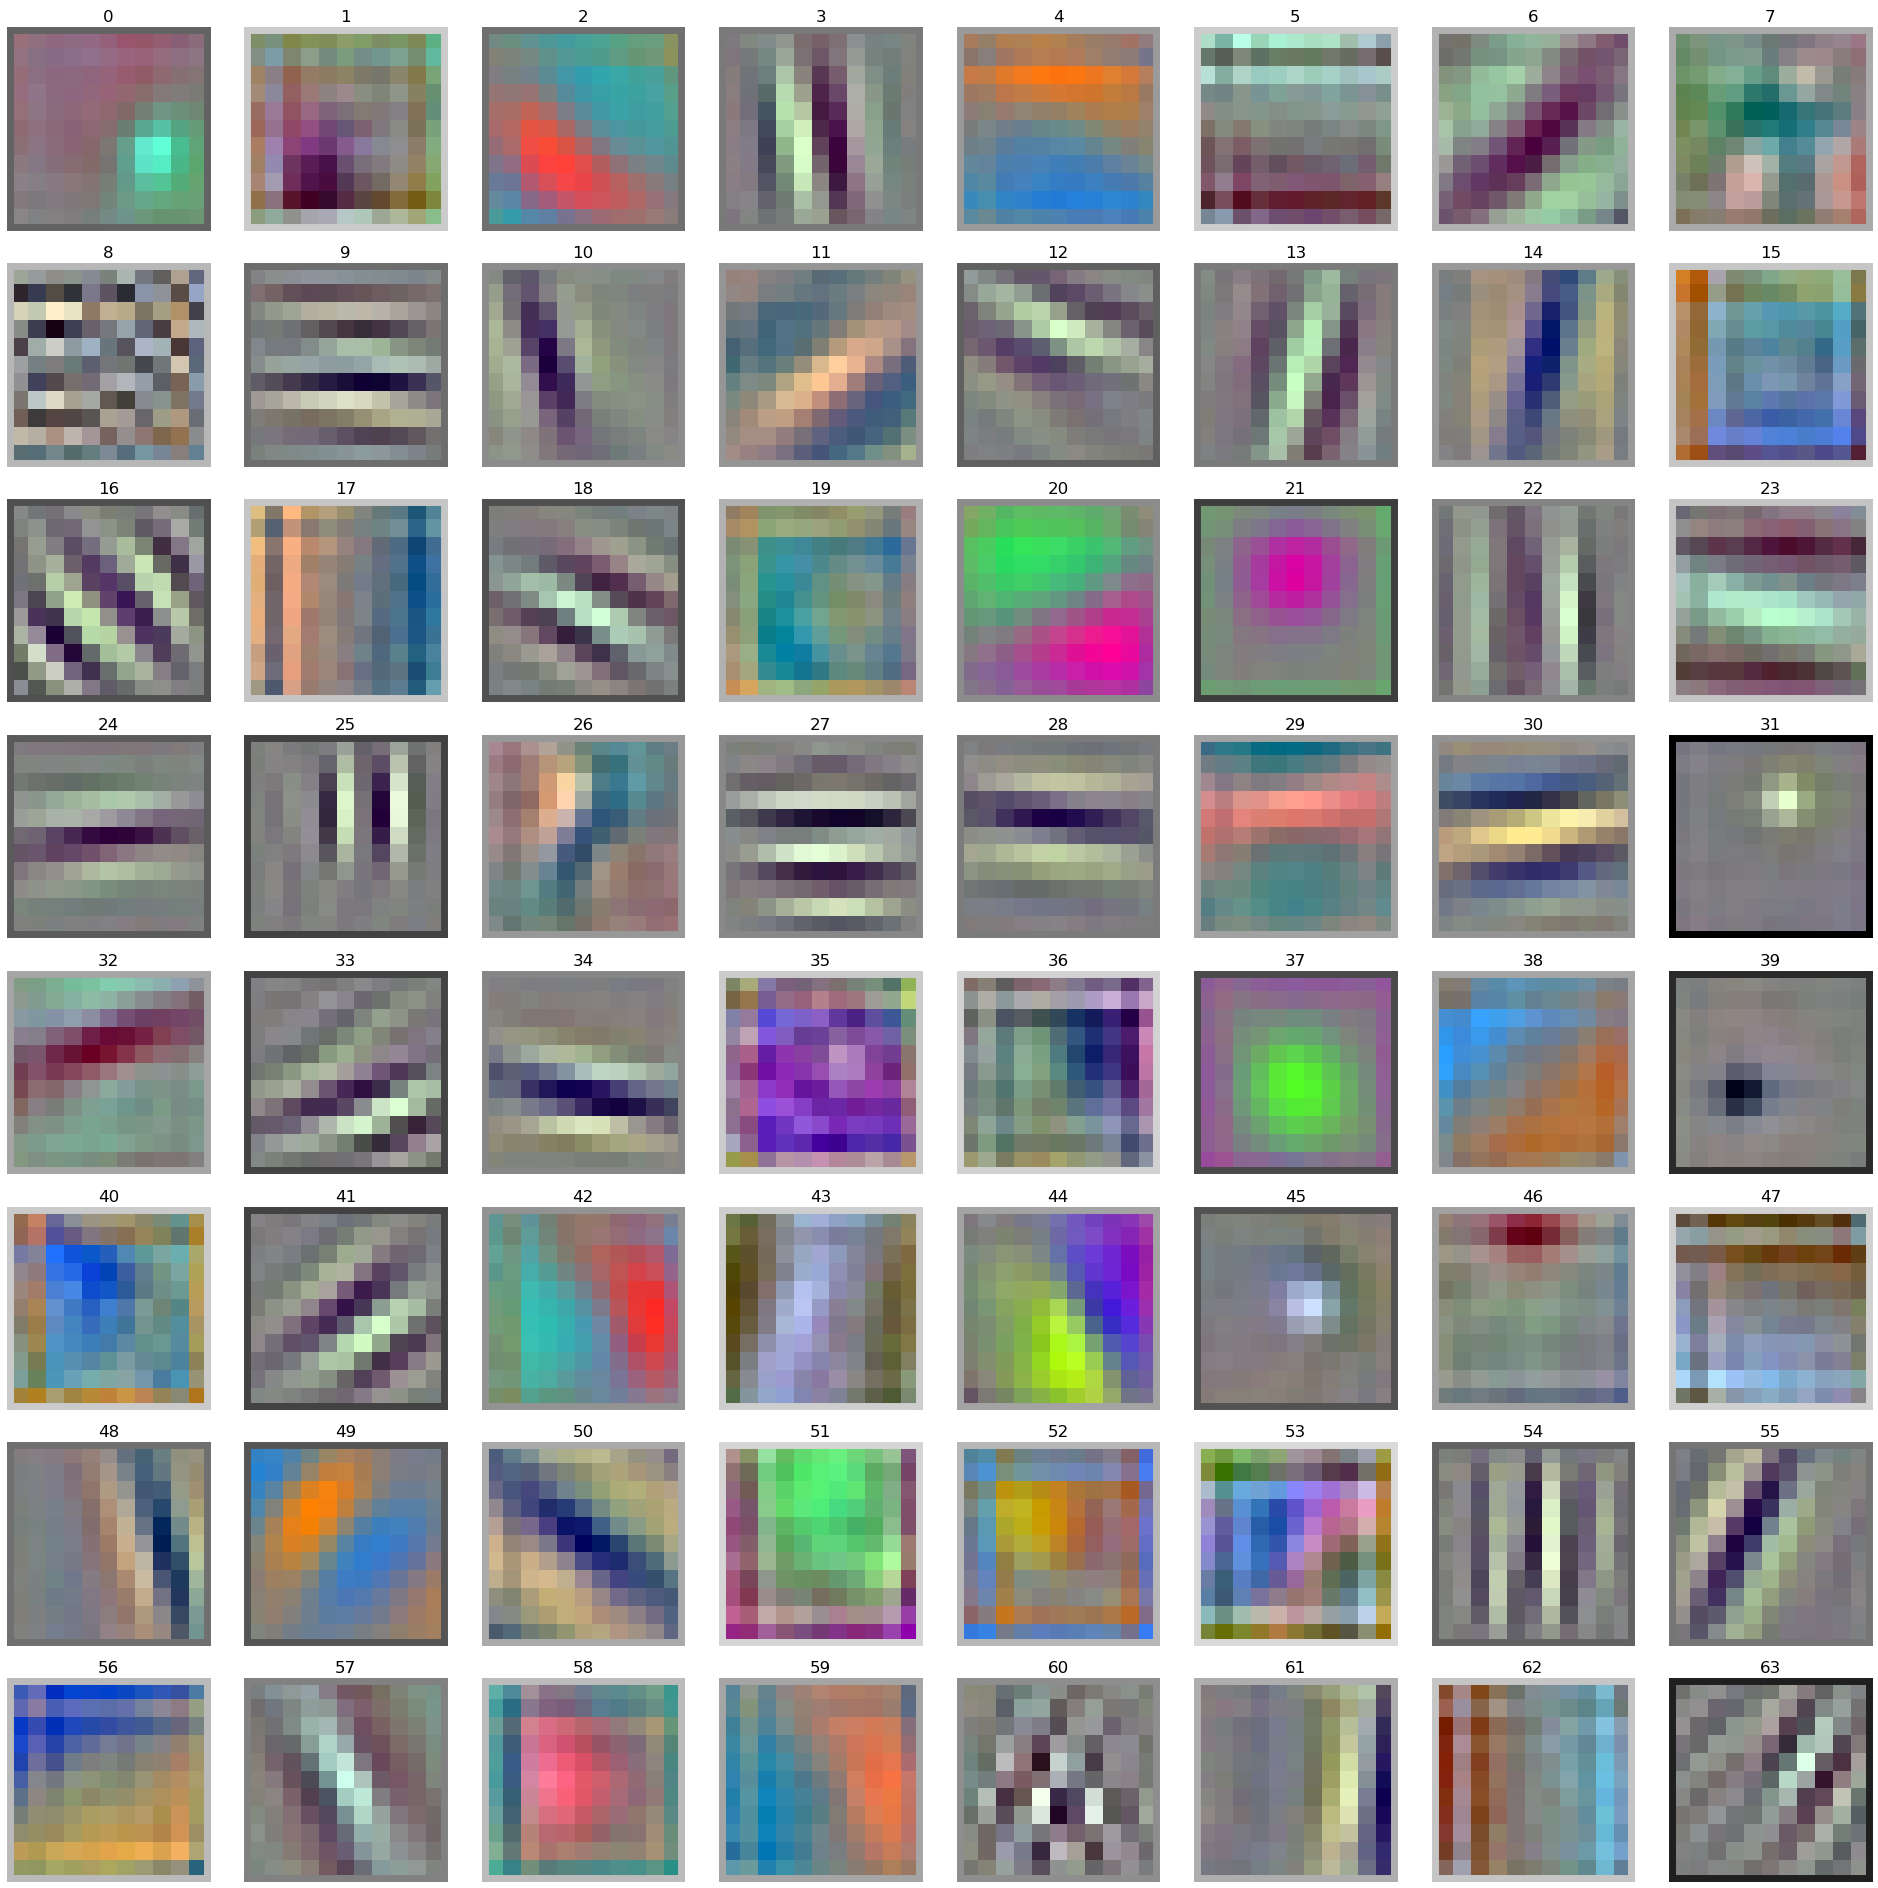

In [6]:
alex = alexnet(AlexNet_Weights.DEFAULT)
multiplot(alex.features[0].weight.detach())

In [7]:
summary(alex)

Layer (type:depth-idx)                   Param #
AlexNet                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       23,296
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
│    └─Conv2d: 2-4                       307,392
│    └─ReLU: 2-5                         --
│    └─MaxPool2d: 2-6                    --
│    └─Conv2d: 2-7                       663,936
│    └─ReLU: 2-8                         --
│    └─Conv2d: 2-9                       884,992
│    └─ReLU: 2-10                        --
│    └─Conv2d: 2-11                      590,080
│    └─ReLU: 2-12                        --
│    └─MaxPool2d: 2-13                   --
├─AdaptiveAvgPool2d: 1-2                 --
├─Sequential: 1-3                        --
│    └─Dropout: 2-14                     --
│    └─Linear: 2-15                      37,752,832
│    └─ReLU: 2-16                        --
│    └─Dropout: 2-17                   

100%|██████████| 256/256 [00:01<00:00, 225.48it/s]


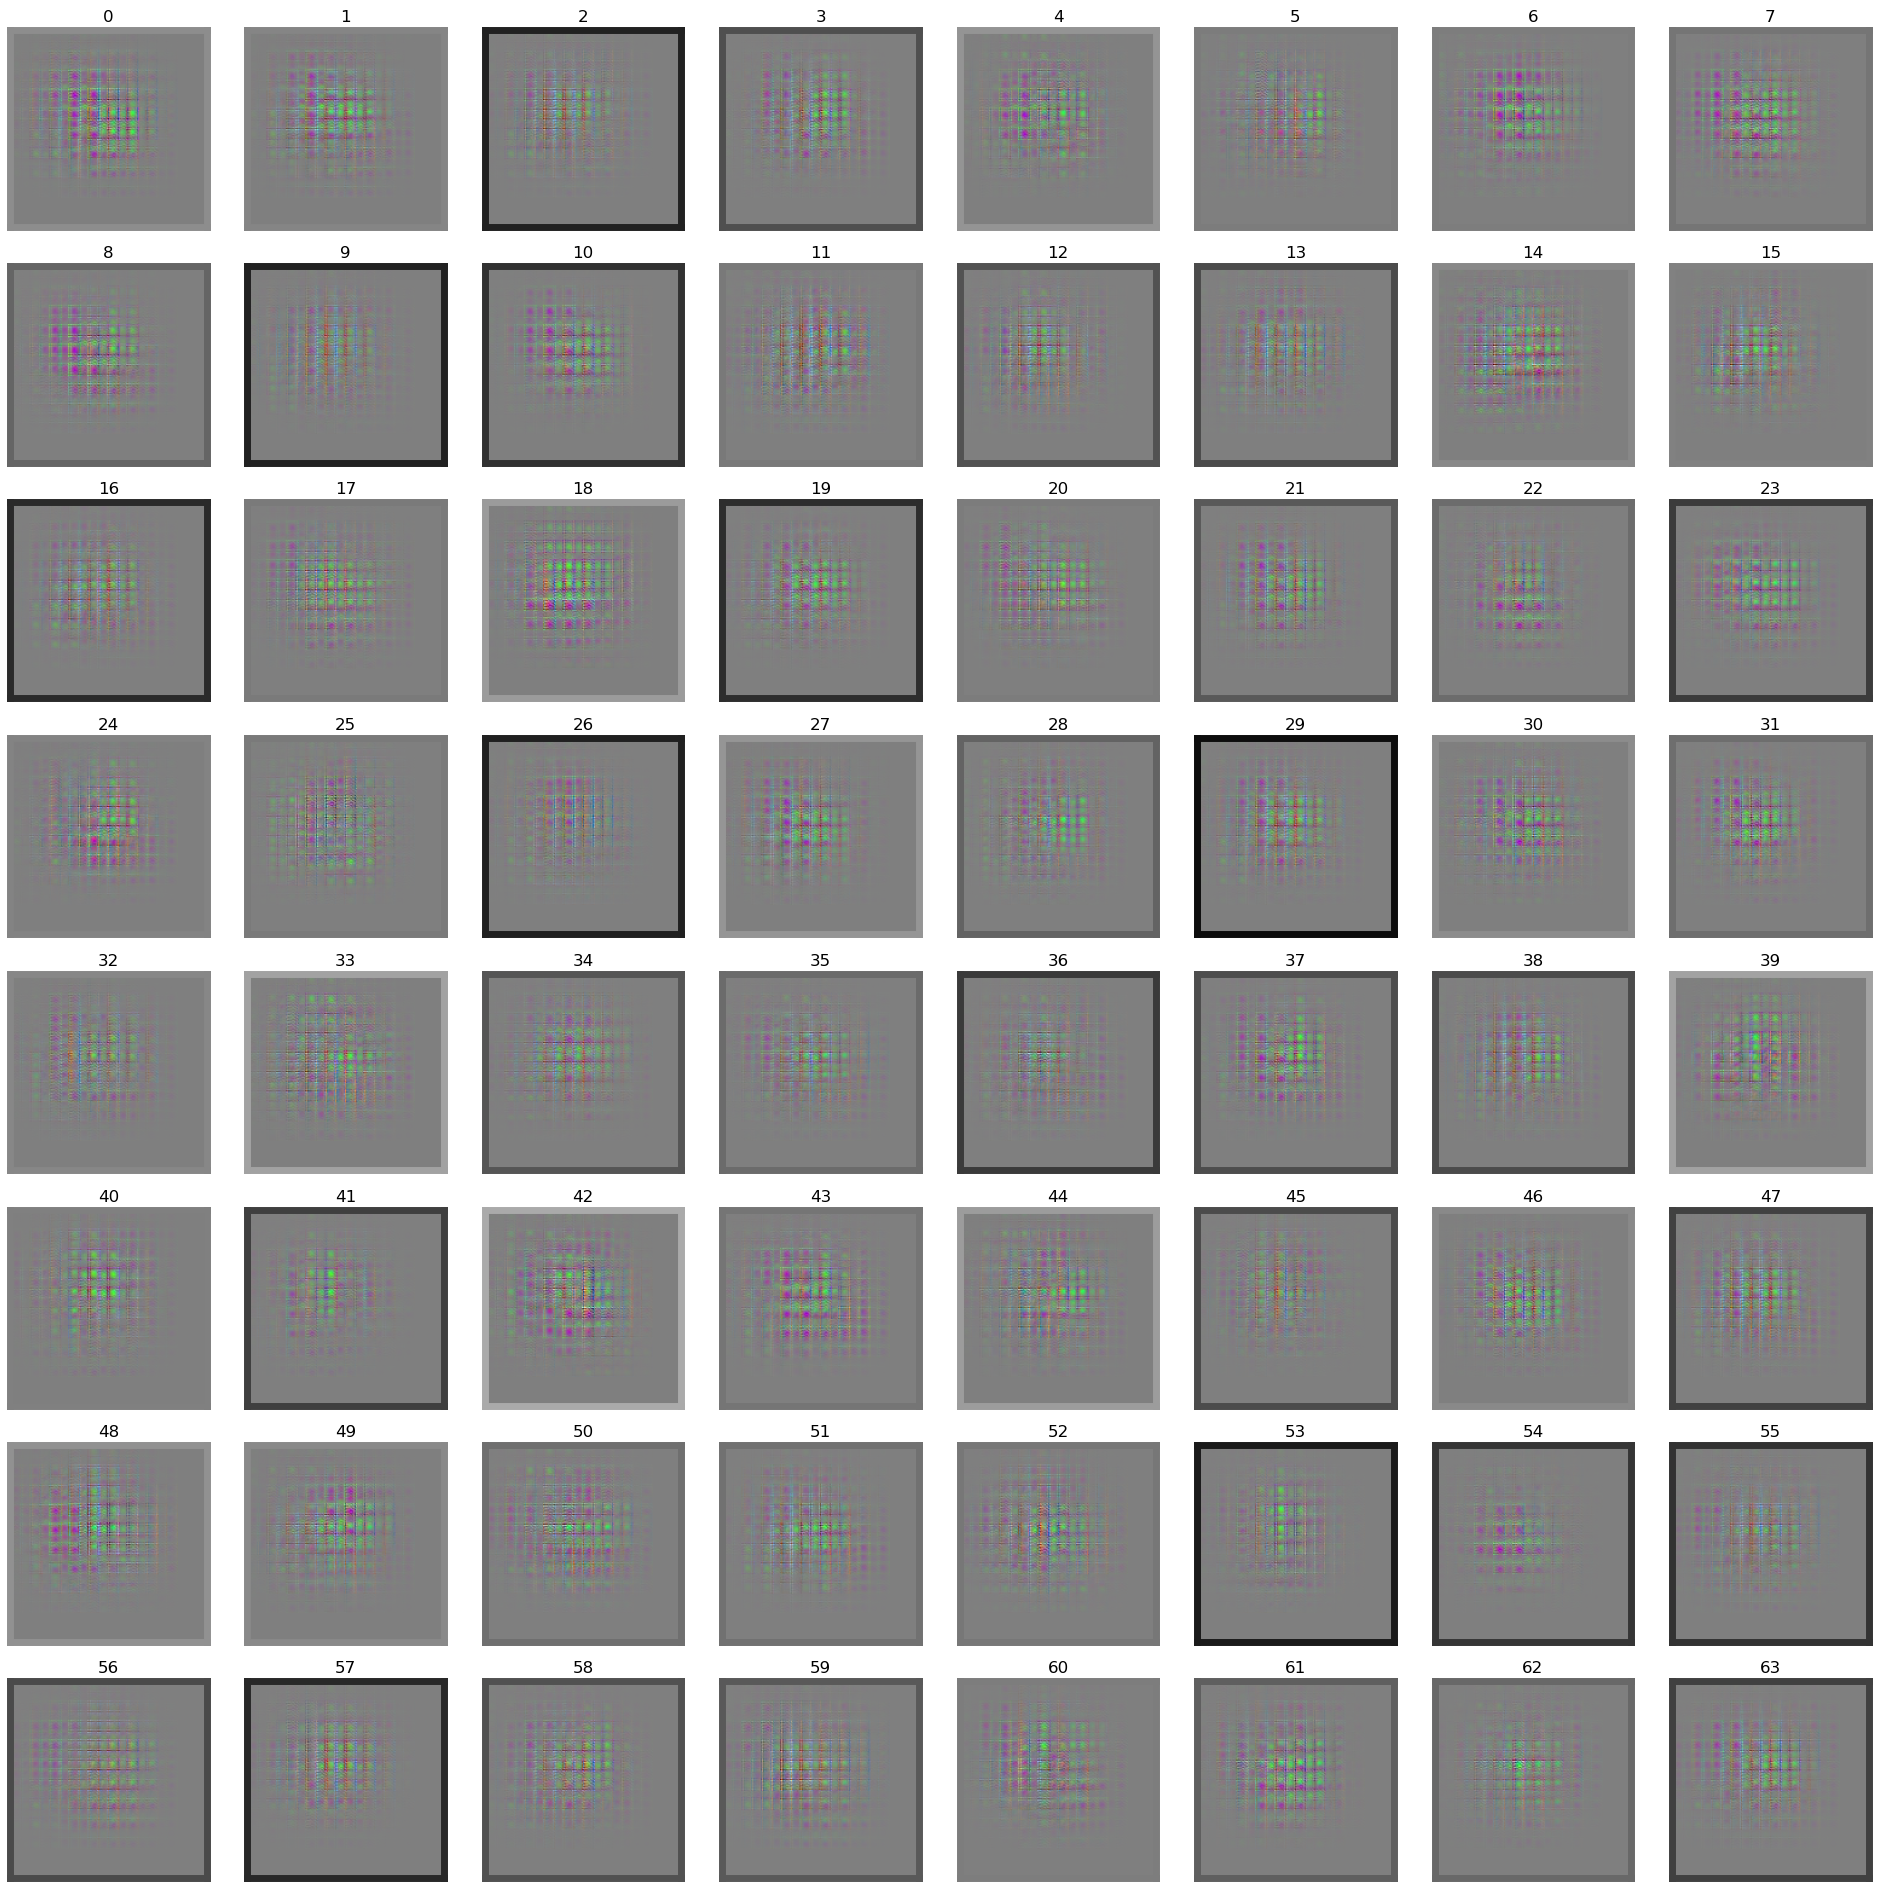

In [8]:
alex = alex.to(device)
eff_rfs=effective_receptive_field(alex.features[:11], n_batch=1, fill_value=.5, device=device)
multiplot(eff_rfs, individ_rescale=True)

# ConvNext

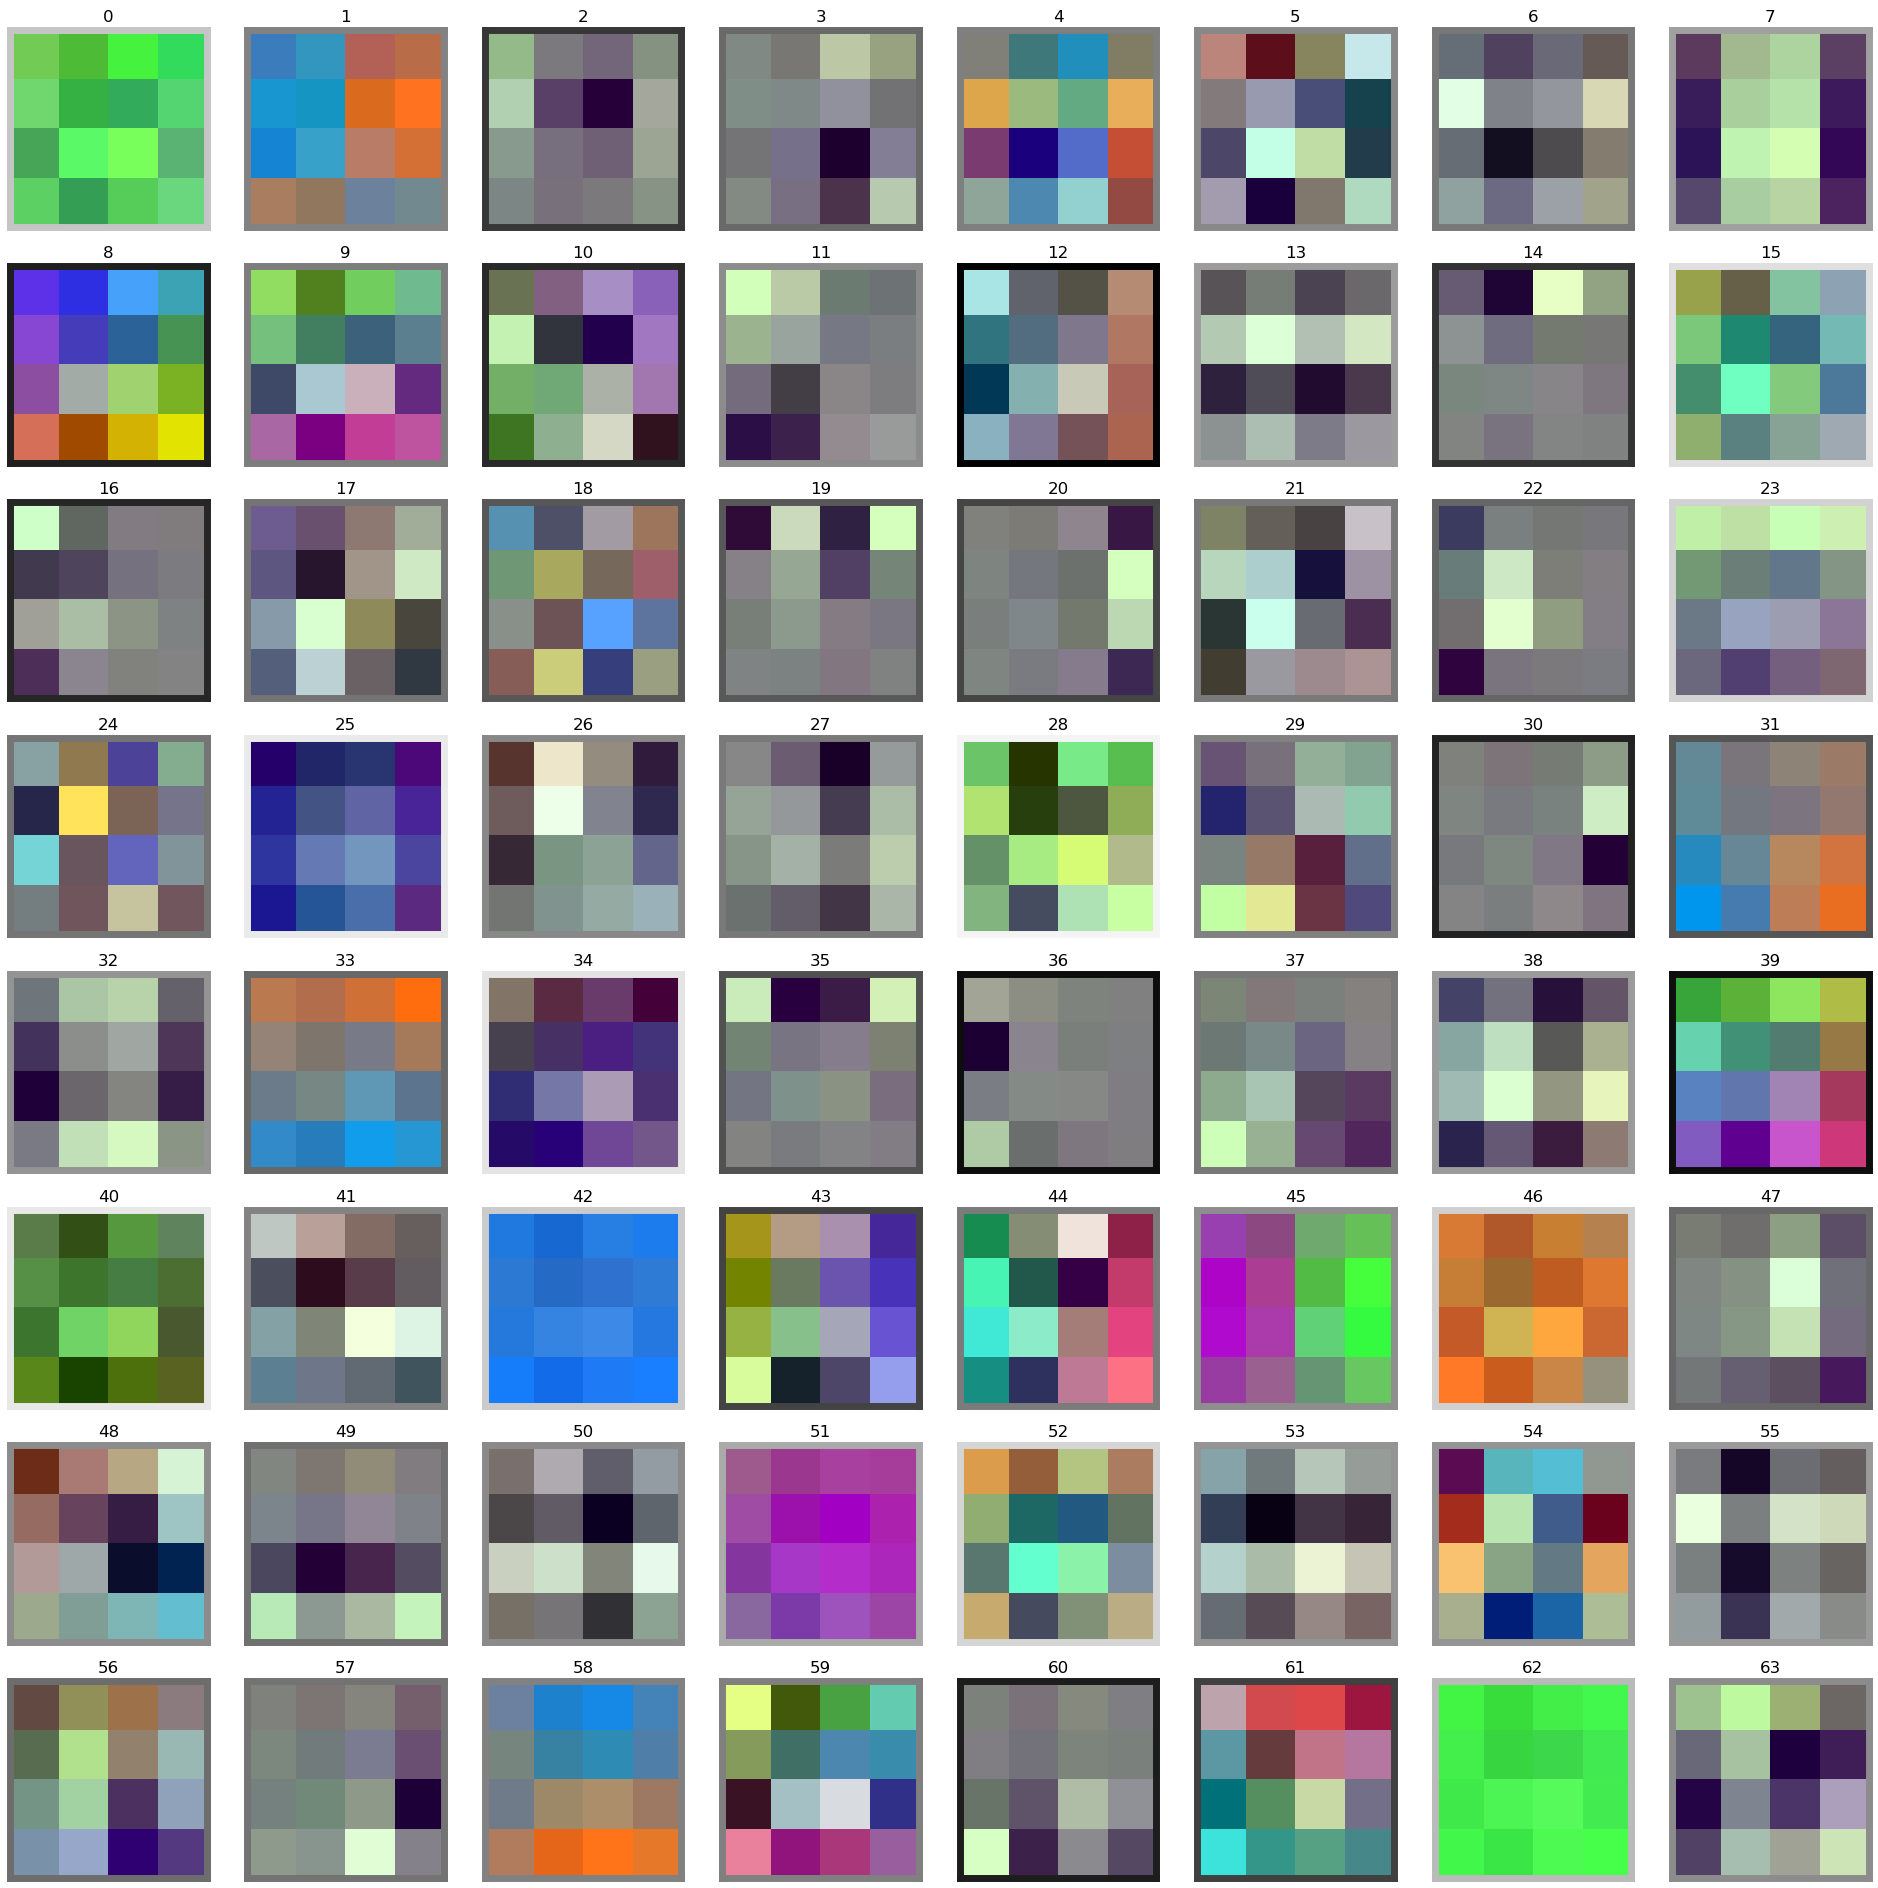

In [9]:
conv_n = convnext_base(ConvNeXt_Base_Weights.DEFAULT)
multiplot(conv_n.features[0][0].weight.detach())

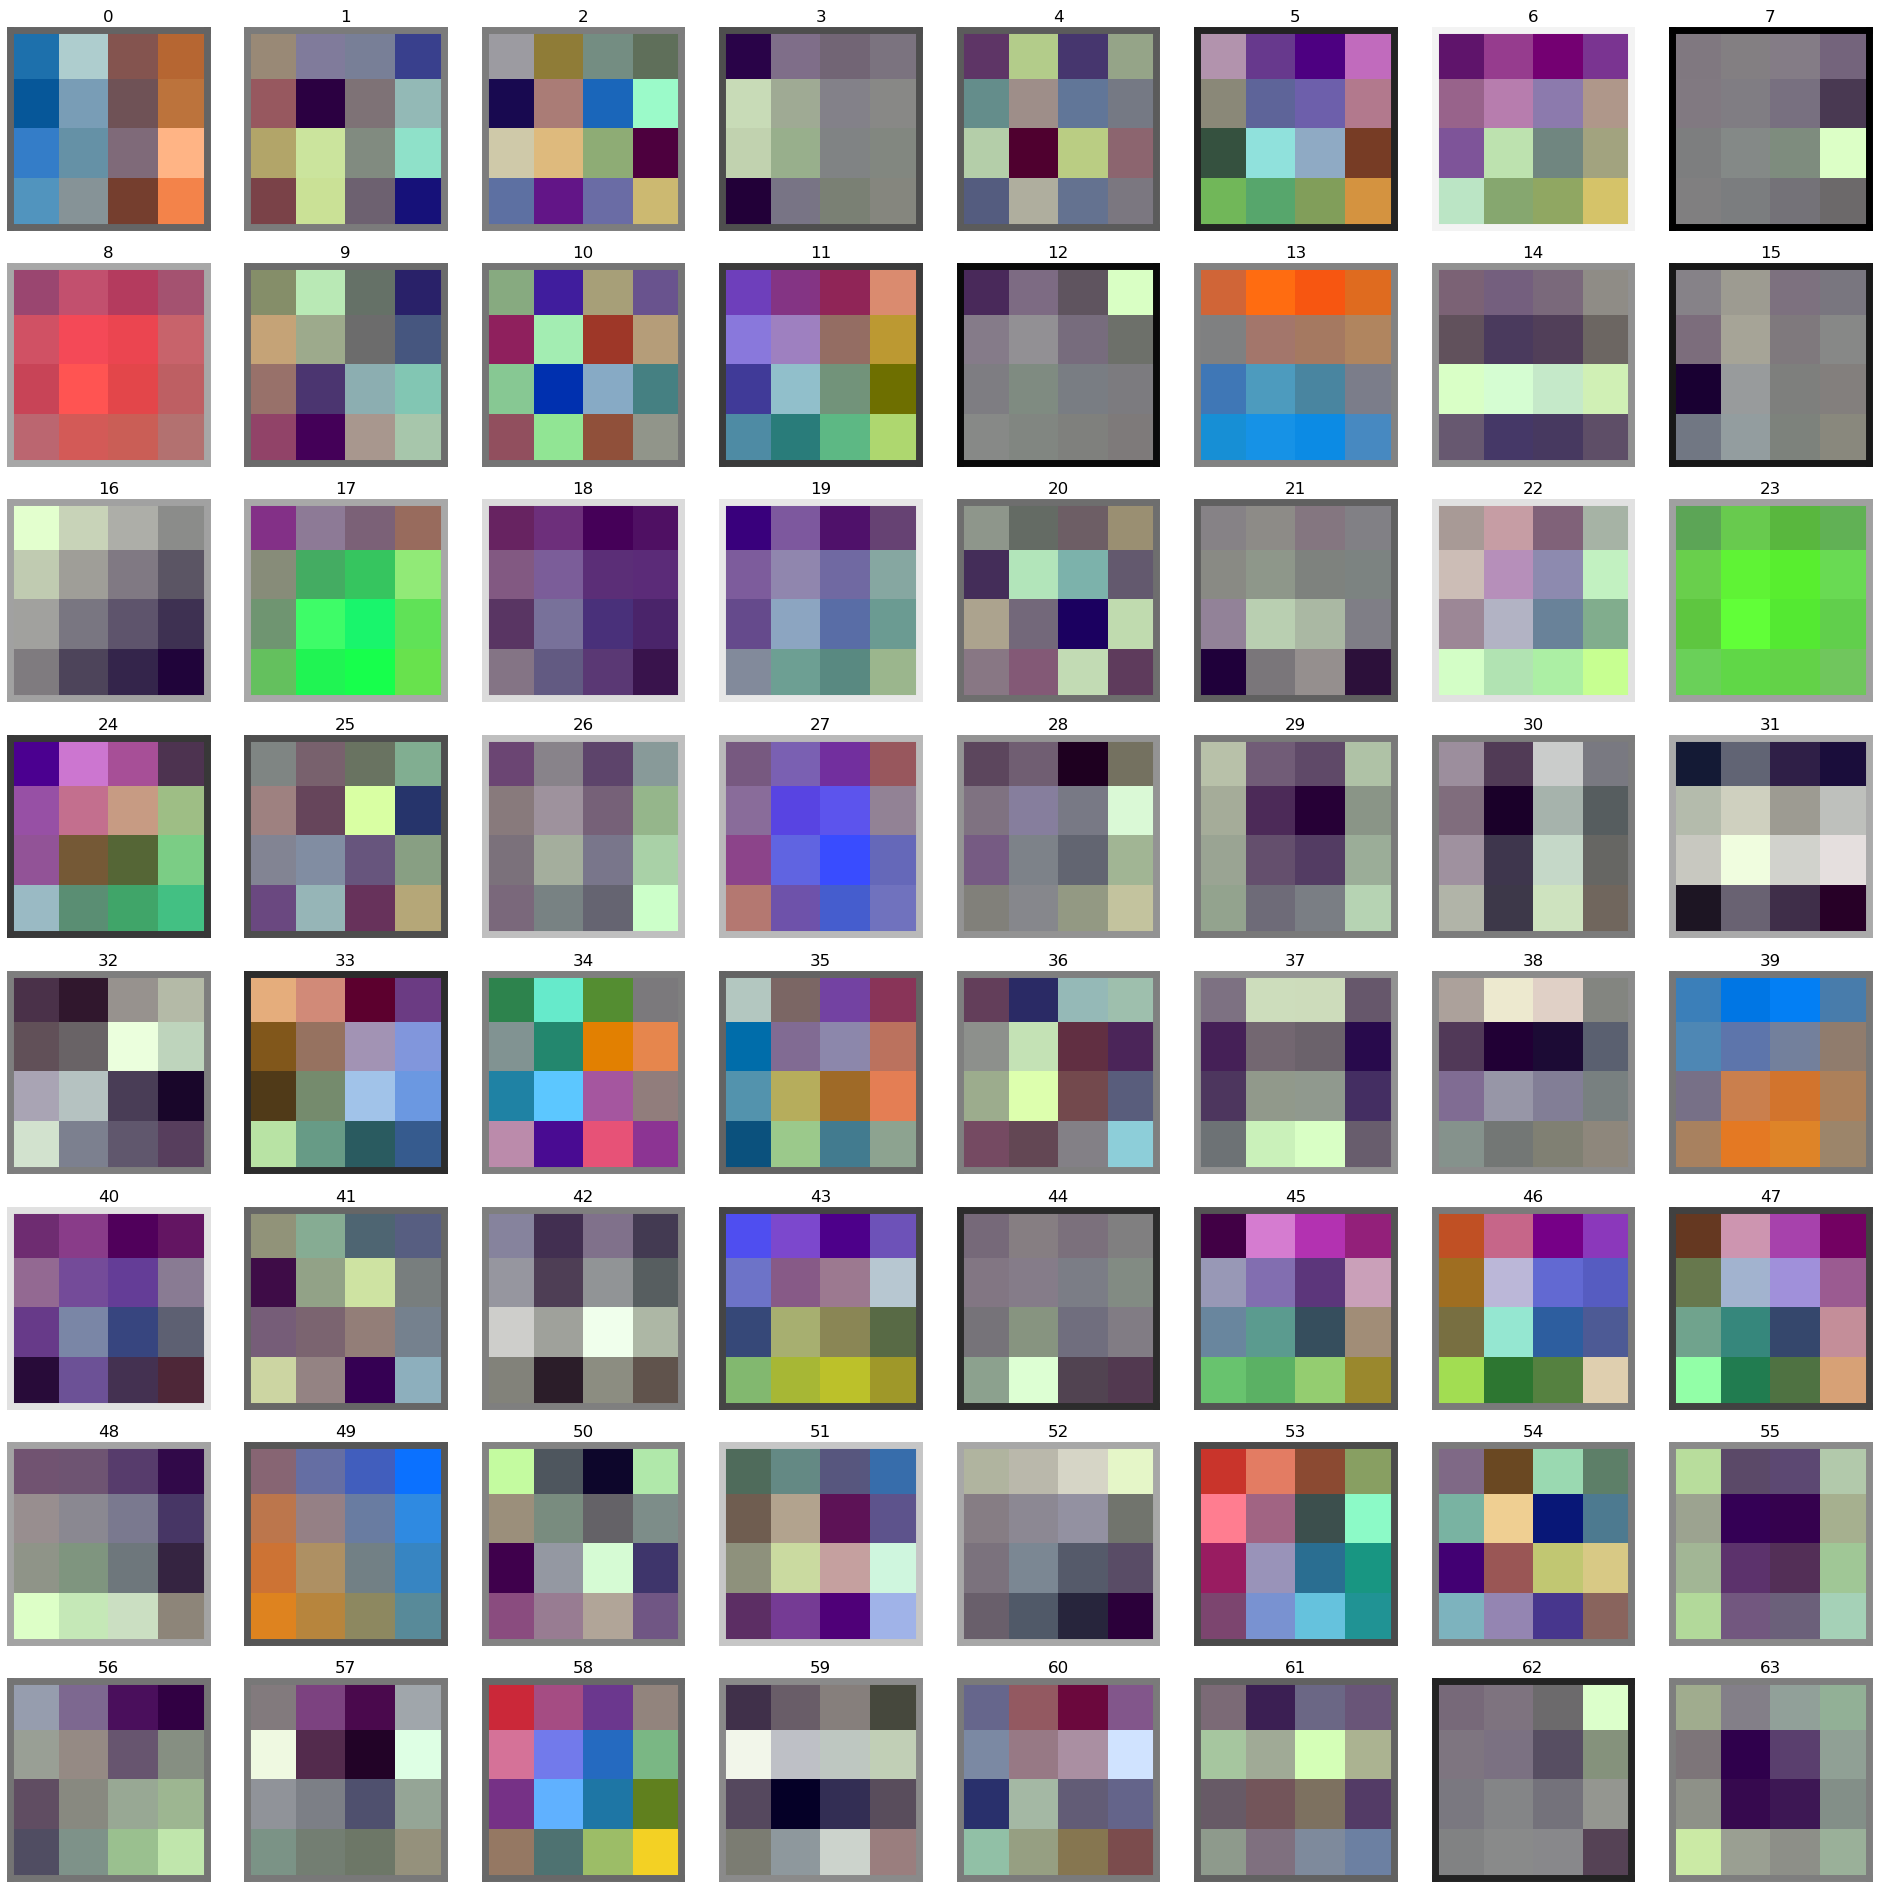

In [10]:
conv_n_tiny = convnext_tiny(ConvNeXt_Tiny_Weights.DEFAULT)
multiplot(conv_n_tiny.features[0][0].weight.detach(), individ_rescale=True)

# EfficientNet

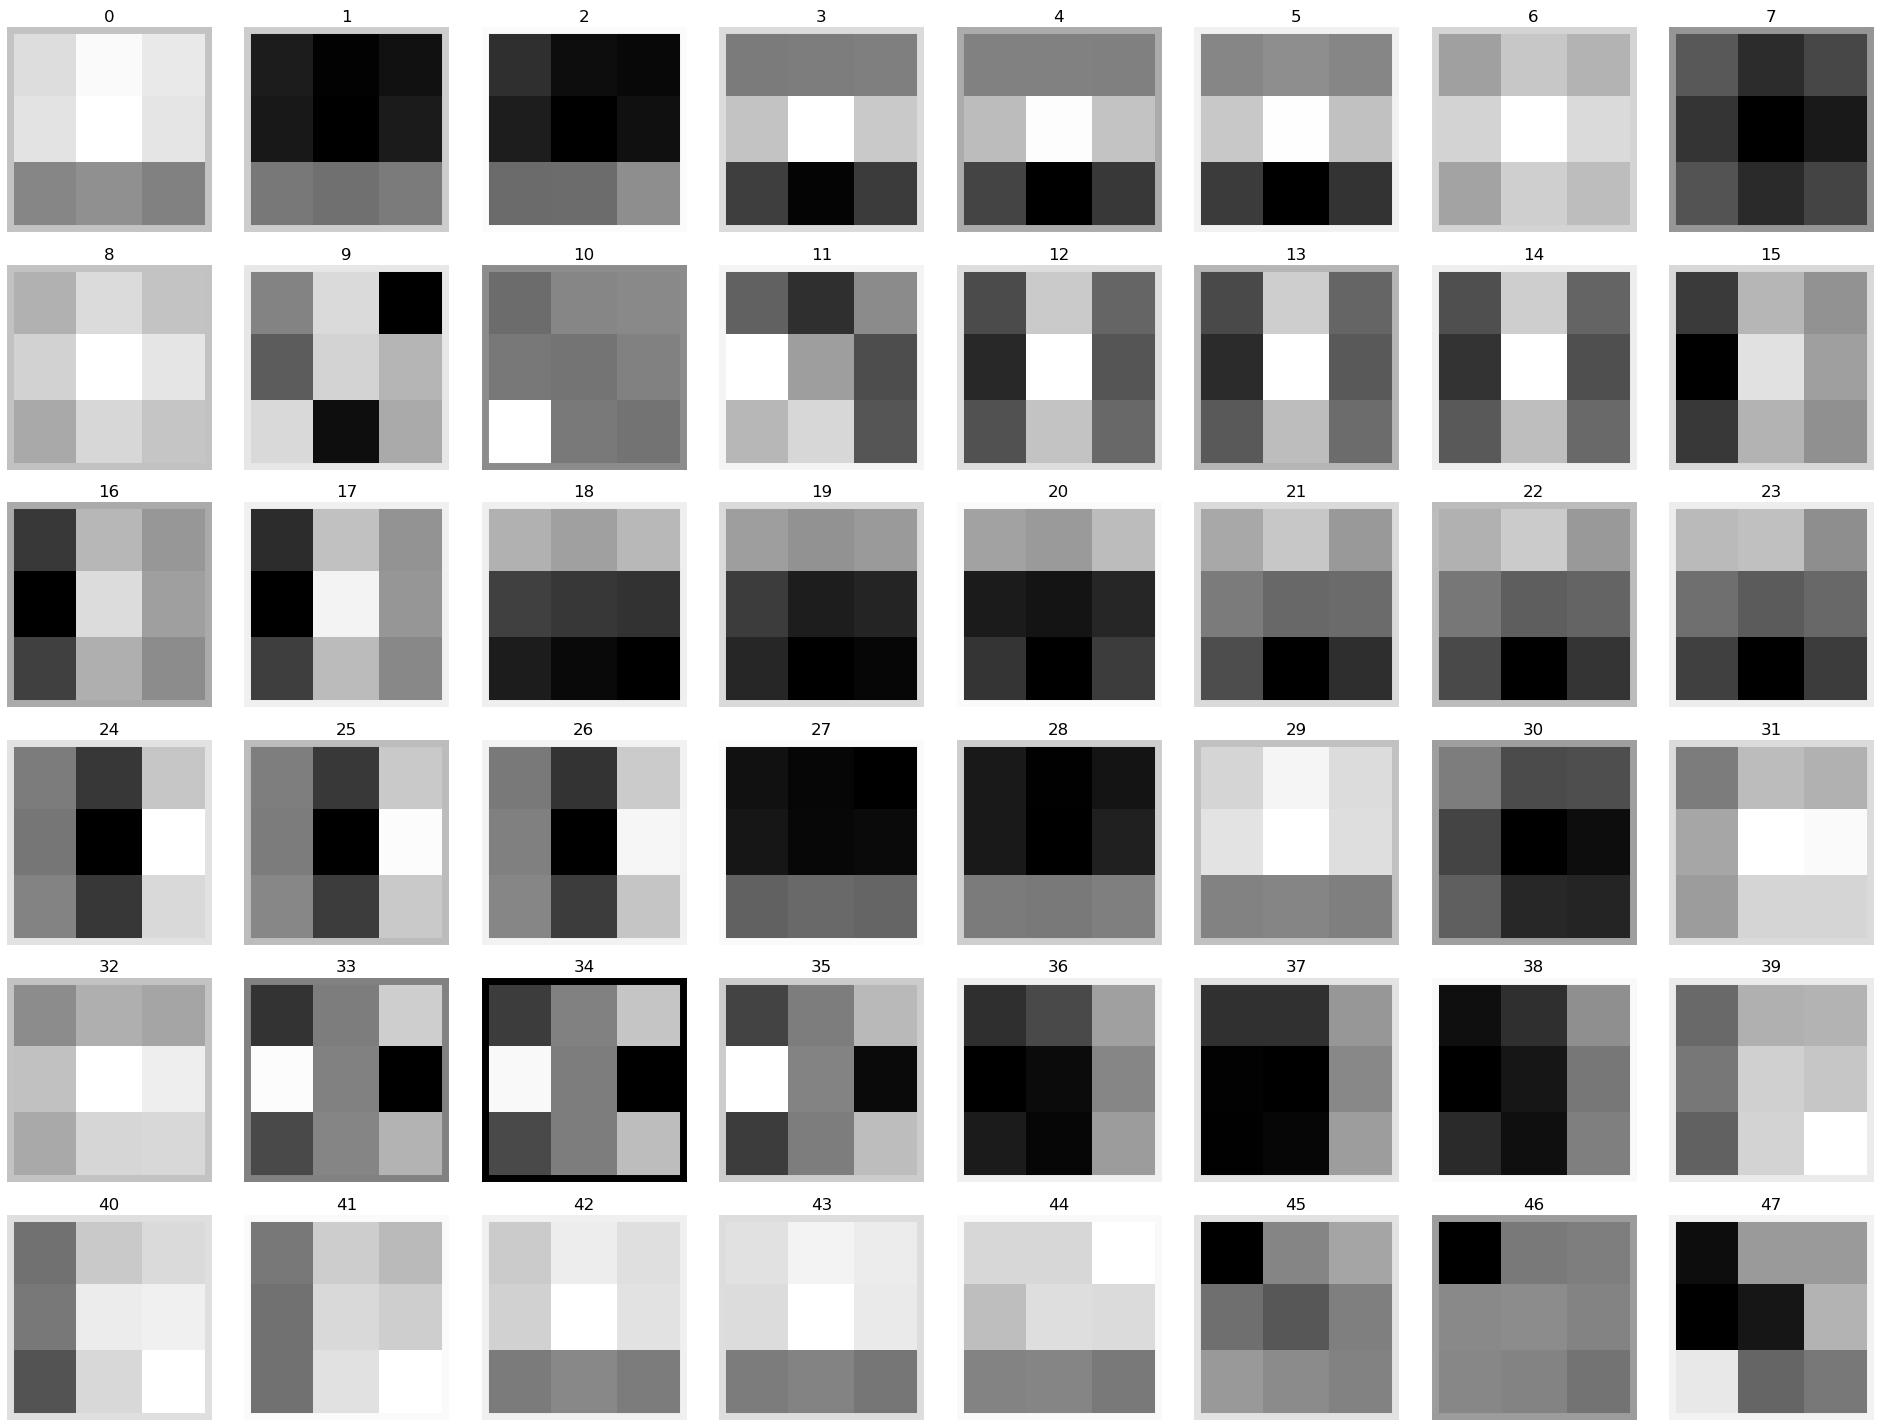

In [11]:
mob_net = mobilenet_v3_small(MobileNet_V3_Small_Weights.DEFAULT)
multiplot(mob_net.features[0][0].weight.detach(), color=False, individ_rescale=True)